IST341_Participant_8 FINAL PROJECT IST 341  07MAY2025

In [ ]:
pip install darts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install u8darts[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.1 MB/s eta 0:00:00


In [ ]:
from darts import TimeSeries

series = TimeSeries.from_csv(
    "Vegas_Traffic_Tidy_Validated.csv",
    time_col="Date",
    value_cols="Visitor Volume",
    fill_missing_dates=True,
    freq="MS"
)


In [ ]:
train, val = series.split_before(0.85)


<Axes: xlabel='Date'>

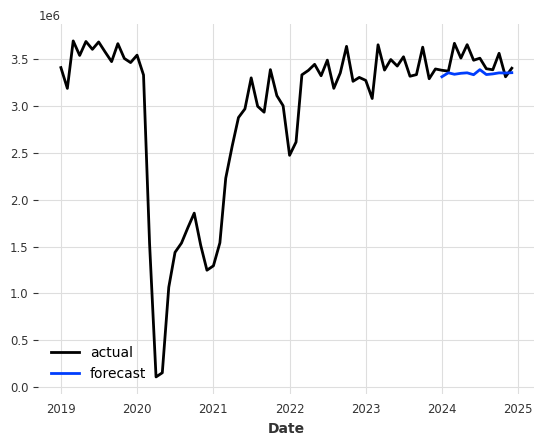

In [ ]:
from darts.models import ARIMA

model = ARIMA()
model.fit(train)
forecast = model.predict(len(val))

series.plot(label="actual")
forecast.plot(label="forecast")


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 700    | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Date'>

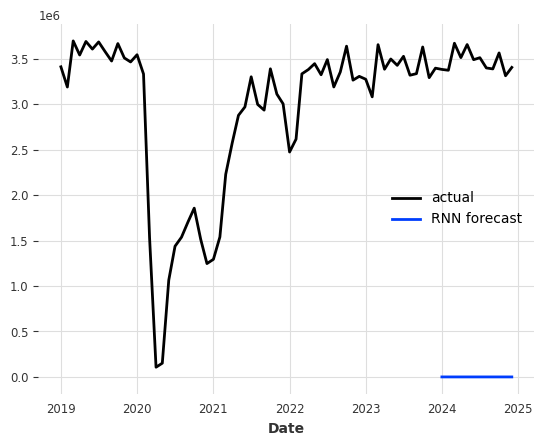

In [ ]:
from darts.models import RNNModel

rnn = RNNModel(model='RNN', input_chunk_length=12, output_chunk_length=6, n_epochs=300)
rnn.fit(train)
forecast_rnn = rnn.predict(len(val))

series.plot(label="actual")
forecast_rnn.plot(label="RNN forecast")


In [ ]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
series_scaled = scaler.fit_transform(series)

train, val = series_scaled.split_before(0.85)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Date'>

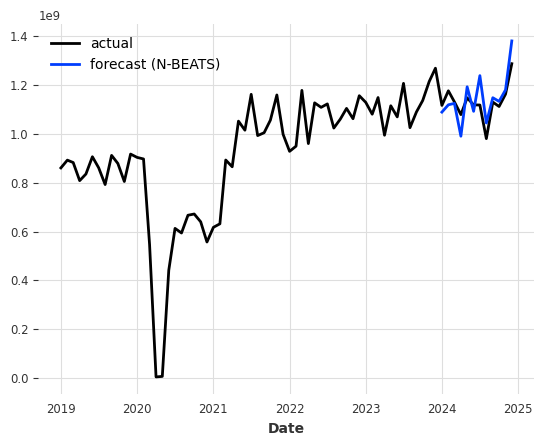

In [ ]:
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler

# Scale the data
scaler = Scaler()
series_scaled = scaler.fit_transform(series)
train, val = series_scaled.split_before(0.85)

# Train a forecasting model
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=500,
    random_state=42
)

model.fit(train)

# Predict and invert scale
forecast = model.predict(len(val))
forecast_inv = scaler.inverse_transform(forecast)

# Plot
series.plot(label="actual")
forecast_inv.plot(label="forecast (N-BEATS)")


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

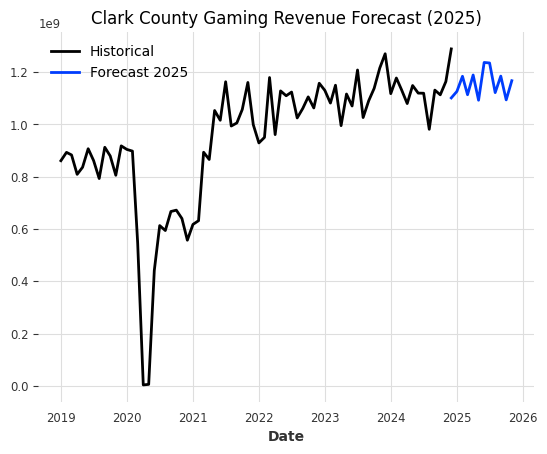

In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")

# Create time series
series = TimeSeries.from_dataframe(df, time_col="Date", value_cols="Gaming Revenue : Clark County", fill_missing_dates=True, freq="MS")

# Normalize
scaler = Scaler()
series_scaled = scaler.fit_transform(series)
# Convert the string to a pandas Timestamp before dropping
# Use the actual end date of the series as the split point
train = series_scaled.drop_after(pd.Timestamp("2024-12-01"))

# Train model
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=500, random_state=42)
model.fit(train)

# Forecast for 2025
forecast = model.predict(12)
forecast_unscaled = scaler.inverse_transform(forecast)

# Plot
series.plot(label="Historical")
forecast_unscaled.plot(label="Forecast 2025")
plt.title("Clark County Gaming Revenue Forecast (2025)")
plt.legend()
plt.show()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

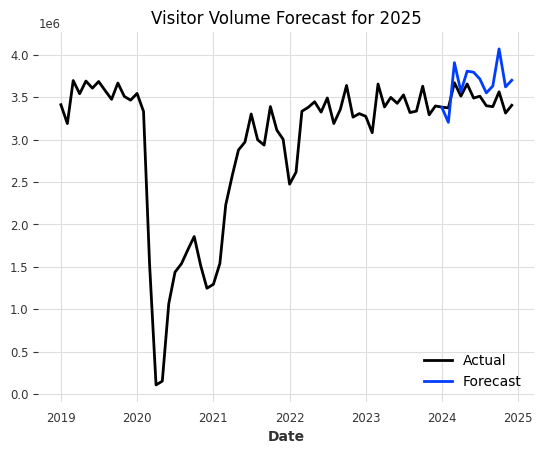

AttributeError: 'TimeSeries' object has no attribute 'pd_dataframe'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mape
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.utils import generate_index # Import generate_index
import torch

# Load data
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")

# Preprocess
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Extract target time series
series = TimeSeries.from_series(df['Visitor Volume'])

# Optionally add datetime covariates (month, year, etc.) - Note: NBEATS does not support future_covariates directly during fit.
# If you want to use covariates with NBEATS, you would typically include them in the input data for training.
# However, the error indicates future_covariates is not supported for fit.
year_series = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
month_series = datetime_attribute_timeseries(series, attribute="month", one_hot=True)
covariates = year_series.stack(month_series)

# Train/val split
train, val = series.split_after(pd.Timestamp("2023-12-01"))
cov_train, cov_val = covariates.split_after(pd.Timestamp("2023-12-01"))

# Define and train the model
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=500,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "cpu"},  # or "gpu" if available
)

# Fit the model without future_covariates as it is not supported by this model
model.fit(train, verbose=True)

# Forecast 12 months (2025)
# When predicting with future covariates, you need to provide them.
# The covariates should cover the forecast horizon.
# Ensure `covariates` covers the period for which you are forecasting (12 months after the end of `series`).
# In this case, `future_cov` should be the covariates for the 12 months you want to predict.
# A common approach is to generate future covariates based on the forecast dates.
# For example:
future_cov_dates = generate_index(start=series.end_time() + series.freq, length=12, freq=series.freq)
future_cov = datetime_attribute_timeseries(future_cov_dates, attribute="year", one_hot=False).stack(
             datetime_attribute_timeseries(future_cov_dates, attribute="month", one_hot=True))

forecast = model.predict(n=12)

# Plot
series.plot(label="Actual")
forecast.plot(label="Forecast")
plt.title("Visitor Volume Forecast for 2025")
plt.legend()
plt.show()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 58, number of used features: 17
[LightGBM] [Info] Start training from score 2859960.344828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

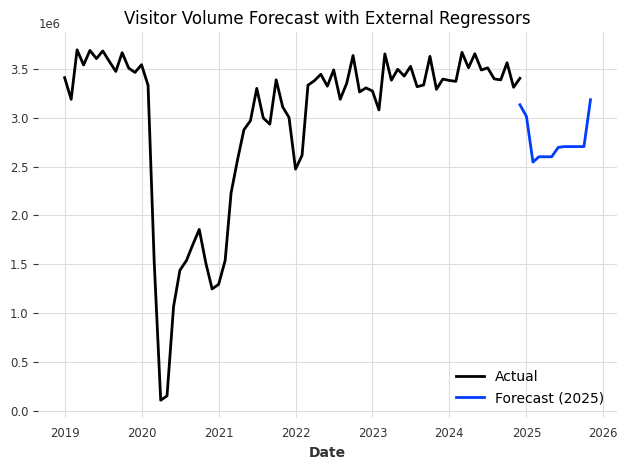

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import LightGBMModel
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.timeseries_generation import generate_index
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 1. Load and preprocess dataset
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

# Define the target variable
series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 2. Prepare external regressors
# -------------------------------
exog_cols = [
    "Convention Attendance",
    "Total En/Deplaned Passengers",
    "Total Room Nights Occupied",
    "Available Room Inventory",
    "Avg. Daily Auto Traffic: All Major Highways*"
]

# Select and forward-fill missing values
df_exog = df[exog_cols].copy().fillna(method="ffill")

# Extend future covariates to cover 2025 by repeating the last known row
last_row = df_exog.iloc[-1]
future_exog = pd.DataFrame([last_row] * 12, columns=exog_cols)
future_dates = pd.date_range(start="2025-01-01", periods=12, freq="MS")
future_exog.index = future_dates

# Combine existing and future covariates
combined_exog = pd.concat([df_exog, future_exog])
full_covariates = TimeSeries.from_dataframe(
    combined_exog,
    fill_missing_dates=True,
    freq="MS"
)

# -------------------------------
# 3. Train/test split
# -------------------------------
# Last available real data is December 2024
train = series.drop_after(pd.Timestamp("2024-12-01"))
train_cov = full_covariates.drop_after(pd.Timestamp("2024-12-01"))

# Forecasting for 12 months (2025)
future_cov = full_covariates.slice(pd.Timestamp("2025-01-01"), pd.Timestamp("2025-12-01"))

# -------------------------------
# 4. Define and train the model
# -------------------------------
model = LightGBMModel(lags=12, lags_future_covariates=[1])
model.fit(series=train, future_covariates=train_cov)

# -------------------------------
# 5. Forecast
# -------------------------------
forecast = model.predict(n=12, future_covariates=future_cov)

# -------------------------------
# 6. Plot and export
# -------------------------------
series.plot(label="Actual")
forecast.plot(label="Forecast (2025)")
plt.title("Visitor Volume Forecast with External Regressors")
plt.legend()
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 58, number of used features: 17
[LightGBM] [Info] Start training from score 2859960.344828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

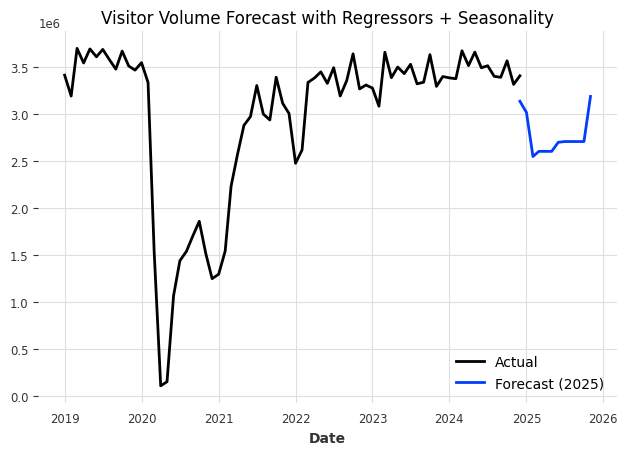

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import LightGBMModel
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 1. Load and preprocess dataset
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

# Define target series
series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 2. Economic external regressors
# -------------------------------
exog_cols = [
    "Convention Attendance",
    "Total En/Deplaned Passengers",
    "Total Room Nights Occupied",
    "Available Room Inventory",
    "Avg. Daily Auto Traffic: All Major Highways*"
]

# Forward-fill missing values
df_exog = df[exog_cols].copy().fillna(method="ffill")

# Extend into 2025 by repeating last known values
last_row = df_exog.iloc[-1]
future_exog = pd.DataFrame([last_row] * 12, columns=exog_cols)
future_dates = pd.date_range(start="2025-01-01", periods=12, freq="MS")
future_exog.index = future_dates

# Combine for full regressor coverage
combined_exog = pd.concat([df_exog, future_exog])
economic_cov = TimeSeries.from_dataframe(combined_exog, freq="MS")

# -------------------------------
# 3. One-hot encoded month covariates
# -------------------------------
# Generate full time index into 2025
full_index = pd.date_range(start=series.start_time(), periods=len(series) + 12, freq="MS")

# Generate month one-hot encodings
month_series = datetime_attribute_timeseries(
    TimeSeries.from_times_and_values(full_index, [0] * len(full_index)),
    attribute="month",
    one_hot=True
)

# -------------------------------
# 4. Combine all covariates
# -------------------------------
full_covariates = economic_cov.stack(month_series)

# Split into training and future periods
train = series.drop_after(pd.Timestamp("2024-12-01"))
train_cov = full_covariates.drop_after(pd.Timestamp("2024-12-01"))
future_cov = full_covariates.slice(pd.Timestamp("2025-01-01"), pd.Timestamp("2025-12-01"))

# -------------------------------
# 5. Train LightGBM model
# -------------------------------
model = LightGBMModel(lags=12, lags_future_covariates=[1])
model.fit(series=train, future_covariates=train_cov)

# -------------------------------
# 6. Forecast 2025
# -------------------------------
forecast = model.predict(n=12, future_covariates=future_cov)

# -------------------------------
# 7. Plot and export
# -------------------------------
series.plot(label="Actual")
forecast.plot(label="Forecast (2025)")
plt.title("Visitor Volume Forecast with Regressors + Seasonality")
plt.legend()
plt.tight_layout()
plt.show()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

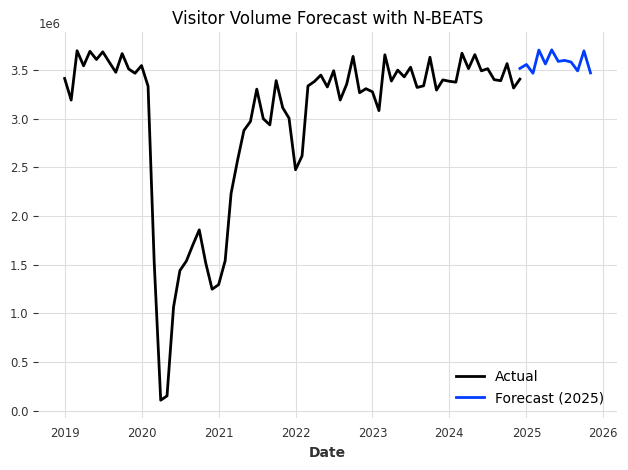

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 1. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 2. Train/test split
# -------------------------------
train = series.drop_after(pd.Timestamp("2024-12-01"))

# -------------------------------
# 3. Define and train model
# -------------------------------
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=500,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "cpu"},  # change to 'gpu' if available
)

model.fit(train, verbose=True)

# -------------------------------
# 4. Predict 12 months (2025)
# -------------------------------
forecast = model.predict(n=12)

# -------------------------------
# 5. Plot and save
# -------------------------------
series.plot(label="Actual")
forecast.plot(label="Forecast (2025)")
plt.title("Visitor Volume Forecast with N-BEATS")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Train ends at:", train.end_time())
forecast = model.predict(n=12)
print("Forecast starts at:", forecast.start_time())


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Train ends at: 2024-11-01 00:00:00


Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast starts at: 2024-12-01 00:00:00


In [ ]:
print(model.model)


_NBEATSModule(
  (criterion): MSELoss()
  (train_criterion): MSELoss()
  (val_criterion): MSELoss()
  (train_metrics): MetricCollection,
    prefix=train_
  )
  (val_metrics): MetricCollection,
    prefix=val_
  )
  (stacks): ModuleList(
    (0-29): 30 x _Stack(
      (blocks): ModuleList(
        (0): _Block(
          (activation): ReLU()
          (fc_stack): ModuleList(
            (0): Linear(in_features=24, out_features=256, bias=True)
            (1-3): 3 x Linear(in_features=256, out_features=256, bias=True)
          )
          (backcast_linear_layer): Linear(in_features=256, out_features=5, bias=True)
          (forecast_linear_layer): Linear(in_features=256, out_features=5, bias=True)
          (backcast_g): Linear(in_features=5, out_features=24, bias=True)
          (forecast_g): Linear(in_features=5, out_features=12, bias=True)
        )
      )
    )
  )
)


In [ ]:
# Get forecast values and timestamps
values = forecast.values().flatten()
dates = forecast.time_index

# Print first 3 forecast values with their dates
print("Forecast for first 3 months of 2025:")
for date, value in zip(dates[:3], values[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value):,} visitors")

Forecast for first 3 months of 2025:
December 2024: 3,515,507 visitors
January 2025: 3,555,886 visitors
February 2025: 3,465,508 visitors


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

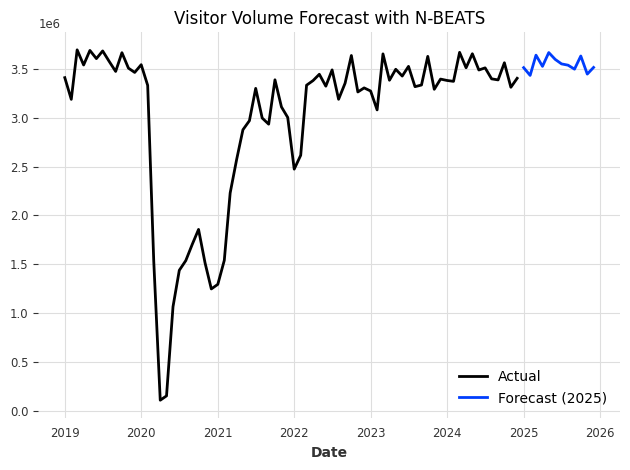

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 1. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 2. Train/test split
# -------------------------------
train = series[:pd.Timestamp("2024-12-01")]

# -------------------------------
# 3. Define and train model
# -------------------------------
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=500,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "cpu"},  # change to 'gpu' if available
)

model.fit(train, verbose=True)

# -------------------------------
# 4. Predict 12 months (2025)
# -------------------------------
forecast = model.predict(n=12)

# -------------------------------
# 5. Plot and save
# -------------------------------
series.plot(label="Actual")
forecast.plot(label="Forecast (2025)")
plt.title("Visitor Volume Forecast with N-BEATS")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Train ends at:", train.end_time())
forecast = model.predict(n=12)
print("Forecast starts at:", forecast.start_time())

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Train ends at: 2024-12-01 00:00:00


Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast starts at: 2025-01-01 00:00:00


In [ ]:
# Get forecast values and timestamps
values = forecast.values().flatten()
dates = forecast.time_index

# Print first 3 forecast values with their dates
print("Forecast for first 3 months of 2025:")
for date, value in zip(dates[:3], values[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value):,} visitors")

Forecast for first 3 months of 2025:
January 2025: 3,514,870 visitors
February 2025: 3,435,249 visitors
March 2025: 3,642,629 visitors


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.1 M  | train
-------------------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.410    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

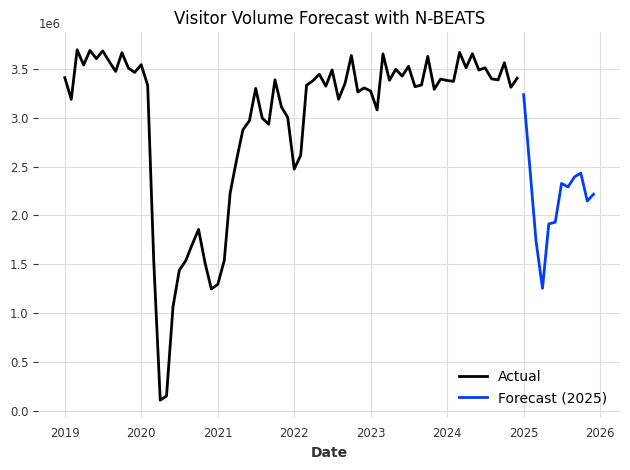

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 1. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 2. Train/test split
# -------------------------------
train = series[:pd.Timestamp("2024-12-01")]

# -------------------------------
# 3. Define and train model
# -------------------------------
model = NBEATSModel(
    input_chunk_length=12,
    output_chunk_length=12,
    n_epochs=500,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "cpu"},  # change to 'gpu' if available
)

model.fit(train, verbose=True)

# -------------------------------
# 4. Predict 12 months (2025)
# -------------------------------
forecast = model.predict(n=12)

# -------------------------------
# 5. Plot and save
# -------------------------------
series.plot(label="Actual")
forecast.plot(label="Forecast (2025)")
plt.title("Visitor Volume Forecast with N-BEATS")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Get forecast values and timestamps
values = forecast.values().flatten()
dates = forecast.time_index

# Print first 3 forecast values with their dates
print("Forecast for first 3 months of 2025:")
for date, value in zip(dates[:3], values[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value):,} visitors")

Forecast for first 3 months of 2025:
January 2025: 3,238,271 visitors
February 2025: 2,455,525 visitors
March 2025: 1,740,830 visitors


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.3 M  | train
-------------------------------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
25.165    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

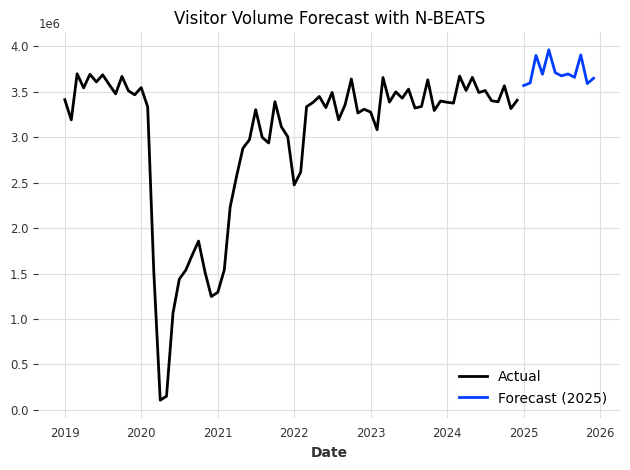

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 1. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 2. Train/test split
# -------------------------------
train = series[:pd.Timestamp("2024-12-01")]

# -------------------------------
# 3. Define and train model
# -------------------------------
model = NBEATSModel(
    input_chunk_length=36,
    output_chunk_length=12,
    n_epochs=500,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "cpu"},  # change to 'gpu' if available
)

model.fit(train, verbose=True)

# -------------------------------
# 4. Predict 12 months (2025)
# -------------------------------
forecast = model.predict(n=12)

# -------------------------------
# 5. Plot and save
# -------------------------------
series.plot(label="Actual")
forecast.plot(label="Forecast (2025)")
plt.title("Visitor Volume Forecast with N-BEATS")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Get forecast values and timestamps
values = forecast.values().flatten()
dates = forecast.time_index

# Print first 3 forecast values with their dates
print("Forecast for first 3 months of 2025:")
for date, value in zip(dates[:3], values[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value):,} visitors")

Forecast for first 3 months of 2025:
January 2025: 3,567,399 visitors
February 2025: 3,595,675 visitors
March 2025: 3,899,213 visitors


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.5 M  | train
-------------------------------------------------------------
6.5 M     Trainable params
1.6 K     Non-trainable params
6.5 M     Total params
25.919    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

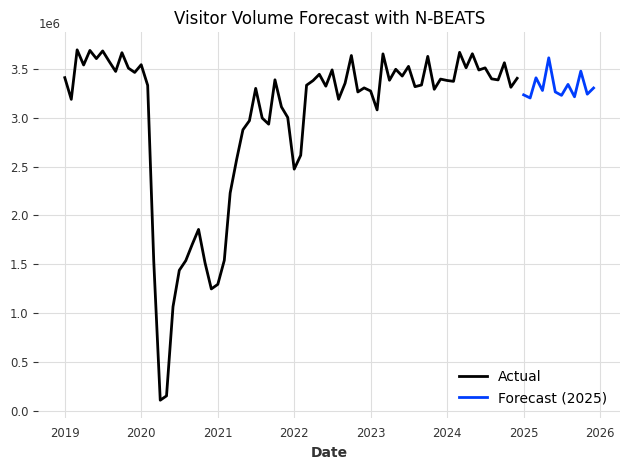

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NBEATSModel
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 1. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 2. Train/test split
# -------------------------------
train = series[:pd.Timestamp("2024-12-01")]

# -------------------------------
# 3. Define and train model
# -------------------------------
model = NBEATSModel(
    input_chunk_length=60,
    output_chunk_length=12,
    n_epochs=500,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "cpu"},  # change to 'gpu' if available
)

model.fit(train, verbose=True)

# -------------------------------
# 4. Predict 12 months (2025)
# -------------------------------
forecast = model.predict(n=12)

# -------------------------------
# 5. Plot and save
# -------------------------------
series.plot(label="Actual")
forecast.plot(label="Forecast (2025)")
plt.title("Visitor Volume Forecast with N-BEATS")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Get forecast values and timestamps
values = forecast.values().flatten()
dates = forecast.time_index

# Print first 3 forecast values with their dates
print("Forecast for first 3 months of 2025:")
for date, value in zip(dates[:3], values[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value):,} visitors")

Forecast for first 3 months of 2025:
January 2025: 3,235,925 visitors
February 2025: 3,203,948 visitors
March 2025: 3,410,712 visitors


In [ ]:
!pip install --quiet u8darts[torch] pandas matplotlib scikit-learn


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 12.6 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
12.7 K    Trainable params
0         Non-trainable params
12.7 K    Total params
0.051     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1500` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast for first 3 months of 2025:
January 2025: 3,396,970 visitors
February 2025: 3,320,511 visitors
March 2025: 3,401,786 visitors


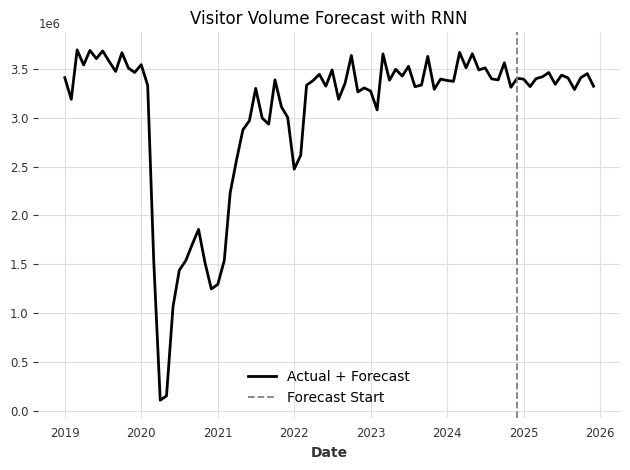

In [ ]:
# -------------------------------
# 🔧 2. Imports and setup
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
import torch
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 📈 3. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 🔄 4. Normalize the series
# -------------------------------
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

# -------------------------------
# 🧠 5. Define and train RNN model
# -------------------------------
input_chunk_length = 24
training_length = 24
forecast_horizon = 12

# Train on data through Dec 2024
train = series_scaled[:pd.Timestamp("2024-12-01")]

model = RNNModel(
    model="RNN",  # or "LSTM", "GRU"
    input_chunk_length=input_chunk_length,
    training_length=training_length,
    hidden_dim=64,
    n_rnn_layers=2,
    dropout=0.2,
    batch_size=16,
    n_epochs=1500,
    random_state=42,
    pl_trainer_kwargs={"accelerator": "gpu" if torch.cuda.is_available() else "cpu"},
)

model.fit(train, verbose=True)

# -------------------------------
# 🔮 6. Forecast 2025
# -------------------------------
forecast_scaled = model.predict(n=forecast_horizon)
forecast = scaler.inverse_transform(forecast_scaled)

# -------------------------------
# 🖨️ 7. Print forecast
# -------------------------------
print("Forecast for first 3 months of 2025:")
for date, value in zip(forecast.time_index[:3], forecast.values()[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value[0]):,} visitors")

# -------------------------------
# 📊 8. Plot forecast
# -------------------------------
if forecast.start_time() <= series.end_time():
    forecast = forecast.drop_before(series.end_time() + series.freq)

from darts import TimeSeries as TS
combined = TS.concatenate(series, forecast)

combined.plot(label="Actual + Forecast")
plt.axvline(x=series.end_time(), color="gray", linestyle="--", label="Forecast Start")
plt.title("Visitor Volume Forecast with RNN")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!pip install --quiet u8darts[torch] pandas matplotlib scikit-learn pytorch-lightning


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | GRU              | 37.8 K | train
6 | V               | Linear           | 65     | train
-------------------------------------------------------------
37.9 K    Trainable params
0         Non-trainable params
37.9 K    Total params
0.152     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast for first 3 months of 2025:
January 2025: 2,839,263 visitors
February 2025: 2,785,581 visitors
March 2025: 2,726,488 visitors


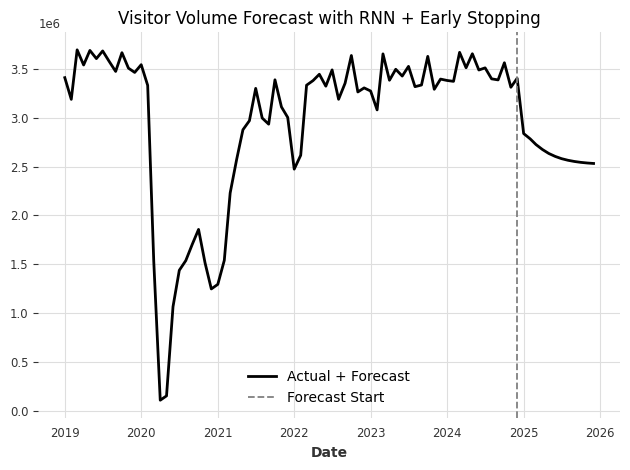

In [ ]:
# -------------------------------
# 🔧 2. Imports and setup
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import torch
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 📈 3. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")
series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 🔄 4. Normalize the series
# -------------------------------
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

# -------------------------------
# 🧠 5. Define early stopping
# -------------------------------
early_stop = EarlyStopping(
    monitor="train_loss",
    patience=10,
    mode="min"
)

# -------------------------------
# 🧠 6. Define and train RNN model
# -------------------------------
input_chunk_length = 71
training_length = 71
forecast_horizon = 12

# Train on data through Dec 2024
train = series_scaled[:pd.Timestamp("2024-12-01")]

model = RNNModel(
    model="GRU",  # or "LSTM", "GRU" RNN
    input_chunk_length=input_chunk_length,
    training_length=training_length,
    hidden_dim=64,
    n_rnn_layers=2,
    dropout=0.2,
    batch_size=16,
    n_epochs=300,
    random_state=42,
    pl_trainer_kwargs={
        "accelerator": "gpu" if torch.cuda.is_available() else "cpu",
        "callbacks": [early_stop],  # ✅ Early stopping included
    },
)

model.fit(train, verbose=True)

# -------------------------------
# 🔮 7. Forecast 2025
# -------------------------------
forecast_scaled = model.predict(n=forecast_horizon)
forecast = scaler.inverse_transform(forecast_scaled)

# -------------------------------
# 🖨️ 8. Print forecast
# -------------------------------
print("Forecast for first 3 months of 2025:")
for date, value in zip(forecast.time_index[:3], forecast.values()[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value[0]):,} visitors")

# -------------------------------
# 📊 9. Plot forecast
# -------------------------------
from darts import TimeSeries as TS
if forecast.start_time() <= series.end_time():
    forecast = forecast.drop_before(series.end_time() + series.freq)

combined = TS.concatenate(series, forecast)

combined.plot(label="Actual + Forecast")
plt.axvline(x=series.end_time(), color="gray", linestyle="--", label="Forecast Start")
plt.title("Visitor Volume Forecast with RNN + Early Stopping")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!pip install --quiet u8darts[torch] pandas matplotlib scikit-learn pytorch-lightning


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 14.0 K | train
5  | decoder_vsn                       | _VariableSelectionNetwork   

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast for first 3 months of 2025:
January 2025: 3,459,723 visitors
February 2025: 3,358,462 visitors
March 2025: 3,529,342 visitors


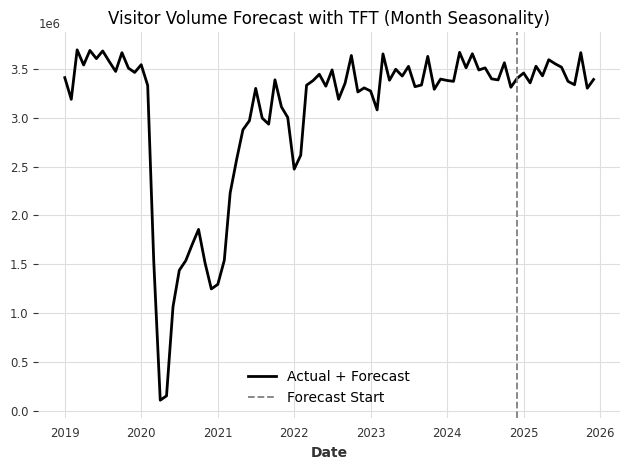

In [ ]:
# -------------------------------
# 📦 1. Install packages
# -------------------------------
!pip install --quiet u8darts[torch] pandas matplotlib scikit-learn pytorch-lightning

# -------------------------------
# 🔧 2. Imports and setup
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TFTModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import torch
import warnings

warnings.filterwarnings("ignore")

# -------------------------------
# 📈 3. Load and prepare data
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values("Date").set_index("Date")

series = TimeSeries.from_series(df["Visitor Volume"])

# -------------------------------
# 🔄 4. Normalize the target
# -------------------------------
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

# -------------------------------
# 📅 5. Create future covariates (one-hot month)
# -------------------------------
# Generate full index including 2025
full_index = pd.date_range(start=series.start_time(), periods=len(series) + 12, freq="MS")
full_series = TimeSeries.from_times_and_values(full_index, [0] * len(full_index))

month_covariates = datetime_attribute_timeseries(
    full_series, attribute="month", one_hot=True
)

# -------------------------------
# ✂️ 6. Train/test split
# -------------------------------
train_series = series_scaled[:pd.Timestamp("2024-12-01")]
train_covariates = month_covariates[:pd.Timestamp("2024-12-01")]
future_covariates = month_covariates.slice(
    pd.Timestamp("2019-01-01"), pd.Timestamp("2025-12-01")
)

# -------------------------------
# 🧠 7. Define and train TFT
# -------------------------------
model = TFTModel(
    input_chunk_length=24,
    output_chunk_length=12,
    hidden_size=32,
    lstm_layers=1,
    dropout=0.1,
    batch_size=16,
    n_epochs=300,
    random_state=42,
    likelihood=None,
    pl_trainer_kwargs={"accelerator": "gpu" if torch.cuda.is_available() else "cpu"},
)

model.fit(train_series, future_covariates=train_covariates, verbose=True)

# -------------------------------
# 🔮 8. Forecast
# -------------------------------
forecast_scaled = model.predict(n=12, future_covariates=future_covariates)
forecast = scaler.inverse_transform(forecast_scaled)

# -------------------------------
# 🖨️ 9. Print forecast
# -------------------------------
print("Forecast for first 3 months of 2025:")
for date, value in zip(forecast.time_index[:3], forecast.values()[:3]):
    print(f"{date.strftime('%B %Y')}: {int(value[0]):,} visitors")

# -------------------------------
# 📊 10. Plot results
# -------------------------------
from darts import TimeSeries as TS
if forecast.start_time() <= series.end_time():
    forecast = forecast.drop_before(series.end_time() + series.freq)

combined = TS.concatenate(series, forecast)

combined.plot(label="Actual + Forecast")
plt.axvline(x=series.end_time(), color="gray", linestyle="--", label="Forecast Start")
plt.title("Visitor Volume Forecast with TFT (Month Seasonality)")
plt.legend()
plt.tight_layout()
plt.show()

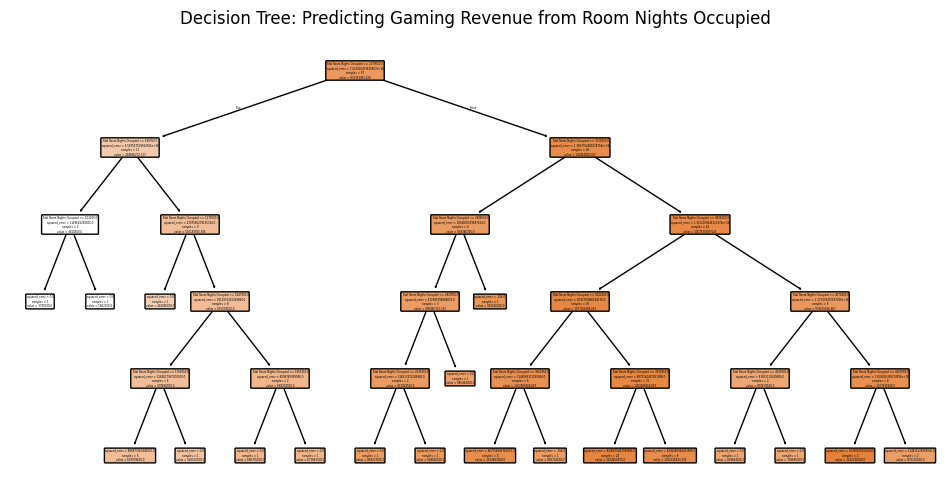

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Load the cleaned dataset
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")

# Select relevant columns and drop missing values
df = df[["Total Room Nights Occupied", "Gaming Revenue : Clark County"]].dropna()

# Prepare features and target
X = df[["Total Room Nights Occupied"]]
y = df["Gaming Revenue : Clark County"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=["Total Room Nights Occupied"], filled=True, rounded=True)
plt.title("Decision Tree: Predicting Gaming Revenue from Room Nights Occupied")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up model and scorer
rf = RandomForestRegressor(random_state=42)
scorer = make_scorer(r2_score)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1)
grid_search.fit(X, y)

# Output the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R² score:", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
Best cross-validated R² score: -2.550021045350099


In [ ]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
print("Test R²:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))


Test R²: 0.4351943238570517
Test MAE: 97678161.69573236


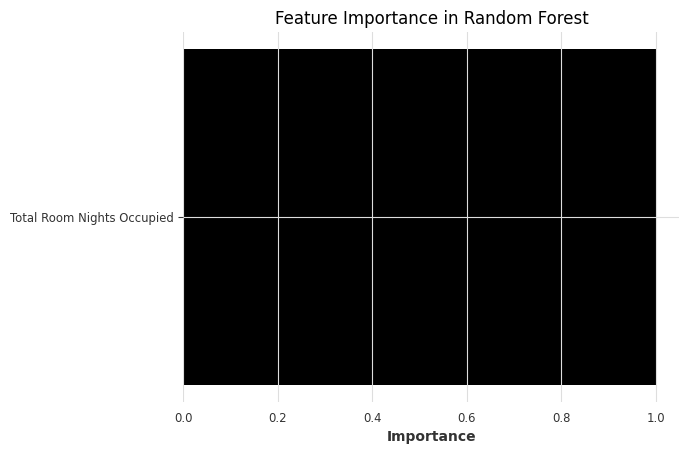

In [ ]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
features = [
    "Total Room Nights Occupied",
    "Available Room Inventory",
    "Visitor Volume",
    "Convention Attendance",
    "Average Daily Room Rate (ADR)"
]

df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df = df[features + ["Gaming Revenue : Clark County"]].dropna()

X = df[features]
y = df["Gaming Revenue : Clark County"]


R² Score: 0.75
Mean Absolute Error: 62,687,962


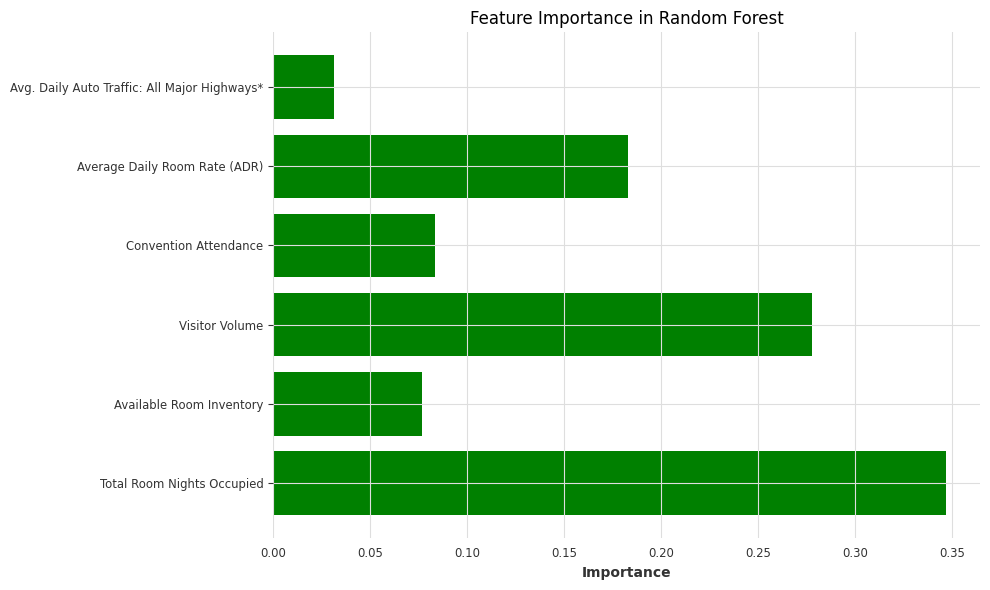

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")

# Select multiple relevant features
features = [
    "Total Room Nights Occupied",
    "Available Room Inventory",
    "Visitor Volume",
    "Convention Attendance",
    "Average Daily Room Rate (ADR)",
    "Avg. Daily Auto Traffic: All Major Highways*"
]

# Define target
target = "Gaming Revenue : Clark County"

# Drop missing values
df = df[features + [target]].dropna()

# Split features and target
X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):,.0f}")

# Plot feature importances
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="green")
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.tight_layout()
plt.show()

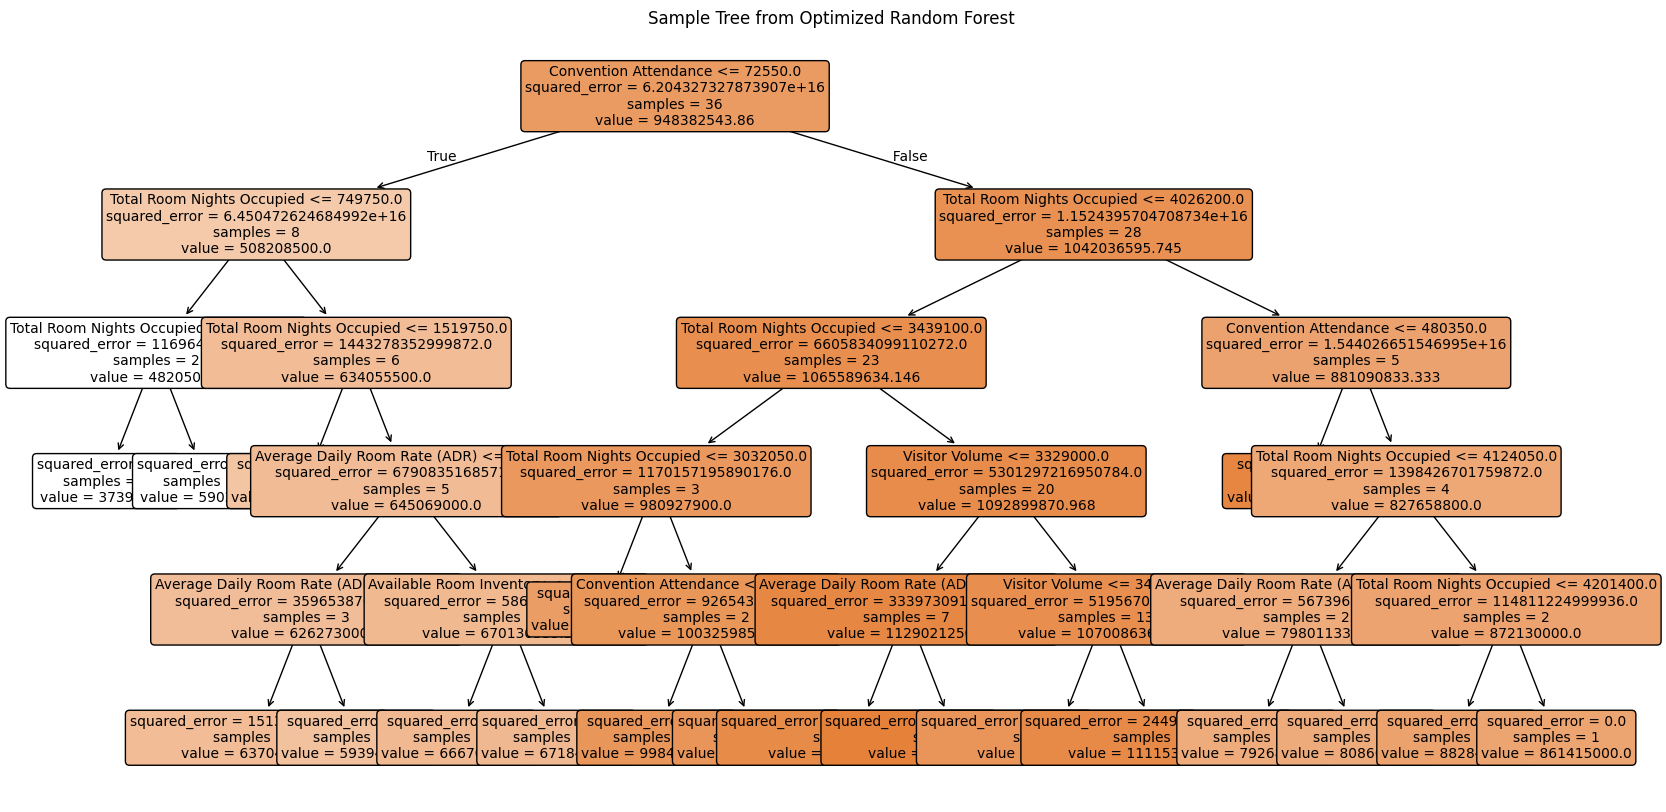

In [ ]:
from sklearn.tree import plot_tree

# Pick one tree from the forest (e.g., the first one)
one_tree = best_rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    one_tree,
    feature_names=features,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Sample Tree from Optimized Random Forest")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 |

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

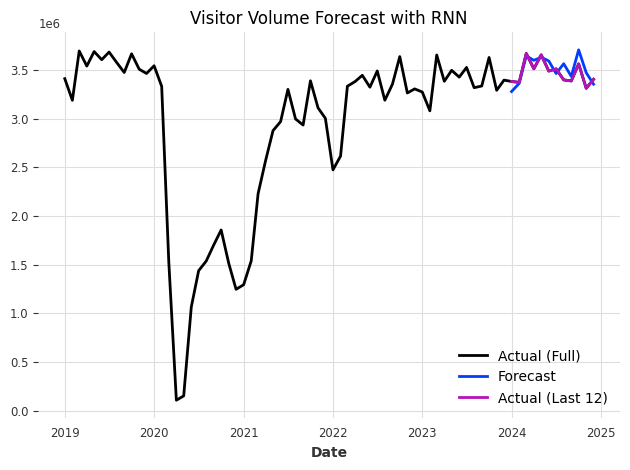

In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Set target and covariates
target_col = "Visitor Volume"
covariate_cols = [
    "Convention Attendance",
    "Total Room Nights Occupied",
    "Total En/Deplaned Passengers",
    "Avg. Daily Auto Traffic: All Major Highways*"
]

# Create TimeSeries objects
target_series = TimeSeries.from_dataframe(df, 'Date', target_col)
covariates_series = TimeSeries.from_dataframe(df, 'Date', covariate_cols)

# Scale data
scaler_target = Scaler()
scaler_covs = Scaler()

target_scaled = scaler_target.fit_transform(target_series)
covs_scaled = scaler_covs.fit_transform(covariates_series)

# Split: last 12 months for testing
train_target, val_target = target_scaled[:-12], target_scaled[-12:]
train_covs, val_covs = covs_scaled[:-12], covs_scaled[-12:]

# Define and train the RNN model
model = RNNModel(
    model='RNN',
    input_chunk_length=24,
    output_chunk_length=12,
    hidden_dim=25,
    n_rnn_layers=1,
    dropout=0.1,
    batch_size=16,
    n_epochs=300,
    random_state=42,
    model_name="visitor_volume_rnn",
    force_reset=True
)

model.fit(train_target, future_covariates=train_covs, verbose=True)


# Predict
forecast = model.predict(n=12, future_covariates=covs_scaled)


# Inverse transform to original scale
forecast = scaler_target.inverse_transform(forecast)
actual = scaler_target.inverse_transform(val_target)

# Plot
target_series.plot(label="Actual (Full)")
forecast.plot(label="Forecast")
actual.plot(label="Actual (Last 12)")
plt.title("Visitor Volume Forecast with RNN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pip install darts[torch]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 800    | train
6 |

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Forecast starts: 2025-01-01 00:00:00
Forecast ends:   2026-12-01 00:00:00


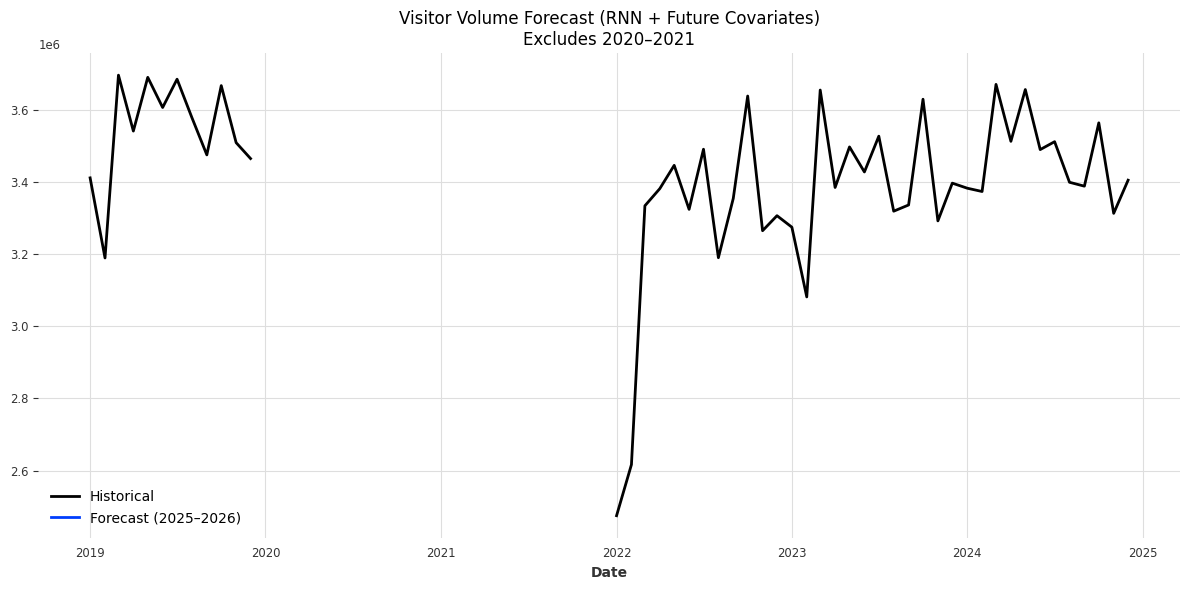

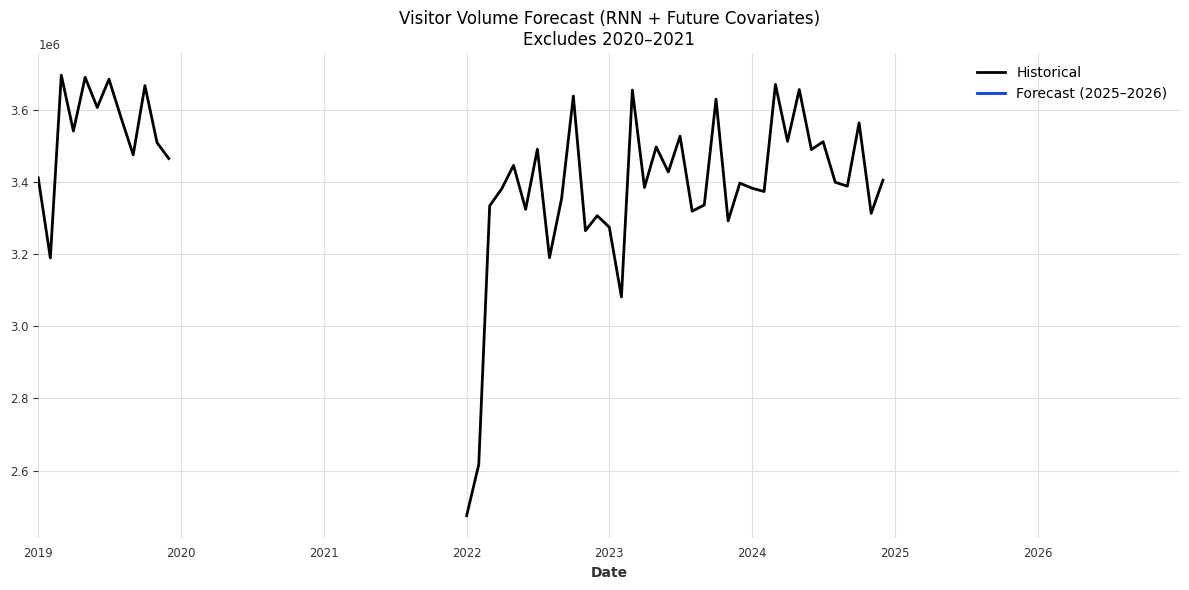

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import generate_index
import matplotlib.pyplot as plt

# -------------------------------
# LOAD & CLEAN DATA
# -------------------------------
df = pd.read_csv("Vegas_Traffic_Tidy_Validated.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Filter: remove 2020–2021 and limit training to Dec 2024
df_filtered = df[
    (df.index.year != 2020) &
    (df.index.year != 2021) &
    (df.index < "2025-01-01")
]

# -------------------------------
# SELECT TARGET AND COVARIATES
# -------------------------------
target_col = "Visitor Volume"
covariate_cols = [
    "Convention Attendance",
    "Total Room Nights Occupied",
    "Total En/Deplaned Passengers",
    "Avg. Daily Auto Traffic: All Major Highways*"
]

# -------------------------------
# CONVERT TO DARTS TimeSeries
# -------------------------------
series = TimeSeries.from_series(df_filtered[target_col], fill_missing_dates=True, freq="MS")
covariates = TimeSeries.from_dataframe(df_filtered[covariate_cols], fill_missing_dates=True, freq="MS")

# -------------------------------
# SCALE TARGET AND COVARIATES
# -------------------------------
scaler_series = Scaler()
scaler_covariates = Scaler()

series_scaled = scaler_series.fit_transform(series)
covariates_scaled = scaler_covariates.fit_transform(covariates)

# -------------------------------
# DEFINE AND TRAIN RNN MODEL
# -------------------------------
model = RNNModel(
    model="RNN",
    input_chunk_length=12,
    n_epochs=300,
    random_state=42,
    model_name="rnn_vegas_forecast",
    dropout=0.1,
    training_length=24,
    log_tensorboard=False,
    force_reset=True
)

model.fit(series_scaled, future_covariates=covariates_scaled)

# -------------------------------
# CREATE FUTURE COVARIATES (Jan 2024 – Dec 2026)
# -------------------------------
future_dates = pd.date_range(start="2024-01-01", periods=36, freq="MS")

# Use last known covariate values
last_values = covariates_scaled[-1].all_values().reshape(-1)

# Create DataFrame of repeated covariates
future_data = pd.DataFrame(
    [last_values] * 36,
    columns=covariates_scaled.components,
    index=future_dates
)

# Convert to TimeSeries
future_covariates = TimeSeries.from_dataframe(future_data, fill_missing_dates=True, freq="MS")

# -------------------------------
# FORECAST 24 MONTHS INTO 2026
# -------------------------------
forecast = model.predict(24, future_covariates=future_covariates)
forecast = scaler_series.inverse_transform(forecast)

# Confirm forecast range
print("Forecast starts:", forecast.start_time())
print("Forecast ends:  ", forecast.end_time())

# -------------------------------
# PLOT RESULTS
# -------------------------------
plt.figure(figsize=(12, 6))
series.plot(label="Historical")
forecast.plot(label="Forecast (2025–2026)")
plt.title("Visitor Volume Forecast (RNN + Future Covariates)\nExcludes 2020–2021")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
series.plot(label="Historical")
forecast.plot(label="Forecast (2025–2026)")
plt.title("Visitor Volume Forecast (RNN + Future Covariates)\nExcludes 2020–2021")
plt.grid(True)
plt.legend()
plt.xlim([pd.Timestamp("2019-01-01"), pd.Timestamp("2026-12-31")])  # <-- force full range
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Get forecast values explicitly
forecast_values = forecast.all_values().flatten()  # Ensures 1D array

# Create DataFrame
forecast_df = pd.DataFrame({
    "date": forecast.time_index,
    "visitor_volume": forecast_values
}).set_index("date")

print(forecast_df)

            visitor_volume
date                      
2025-01-01             NaN
2025-02-01             NaN
2025-03-01             NaN
2025-04-01             NaN
2025-05-01             NaN
2025-06-01             NaN
2025-07-01             NaN
2025-08-01             NaN
2025-09-01             NaN
2025-10-01             NaN
2025-11-01             NaN
2025-12-01             NaN
2026-01-01             NaN
2026-02-01             NaN
2026-03-01             NaN
2026-04-01             NaN
2026-05-01             NaN
2026-06-01             NaN
2026-07-01             NaN
2026-08-01             NaN
2026-09-01             NaN
2026-10-01             NaN
2026-11-01             NaN
2026-12-01             NaN


In [ ]:
test_forecast = model.predict(1, future_covariates=future_covariates)

print("Test forecast values:", test_forecast.all_values())
print("Test forecast start:", test_forecast.start_time())
print("Test forecast end:", test_forecast.end_time())


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Test forecast values: [[[nan]]]
Test forecast start: 2025-01-01 00:00:00
Test forecast end: 2025-01-01 00:00:00


I found data sets on Las Vegas visitors starting in 1970 and how much revenue the casinos have had year after year. Since I lived there for over 2 years, I am curious to play with the data. See what correlations I can find. I also found data sets that break it down by month starting in 2020.

I was not entirely sure where to take it. Some initial ideas I had were to see the correlation between visitors and how much the casinos win in revenue. I felt it may have been something new and different. Professor Dodds helped point me in the right direction, and I just had fun with it from there.

I used RNN, NBEATS, ARMIA, LightGBMModel, Random Forest, and decision trees to play with the dataset.  RNN on paper was the better stallion, but I couldn’t get it to forecast into 2025 when I narrowed its focus.  The data set I had, in my opinion, had irrelevant data. Therefore, I narrowed its focus to 4 covariates, and ignored COVID years, but I could not figure out how to get the script to plot past the end of 2024. The only way I managed to make it work was by not focusing on 4 covariates and letting RNN use the entire data set.

NBEATS offered me a better solution based on 2025 actuals that were already available.  With that being said, I must note, when RNN was trained against the actuals. It was able to come a lot closer to the actuals than NBEATS.

To take it to the next level. I simply need to figure out RNN.  The easy solution is to simply delete irrelevant data and keep what I want in the .csv file, but I want to challenge myself and figure it out.  I strongly believe, after noticing how well it performed predicting 2024, it is much better than NBEATS.

I don’t think I would have talked it any differently; I was exploring, learning, and I went down rabbit holes constantly. I had a lot of fun with this one. I still have a long way to go to feel extremely confident with python,  but I feel confident enough to figure out anything asked from me.
